In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## Problem 1

In [3]:
np.random.seed(20071969)

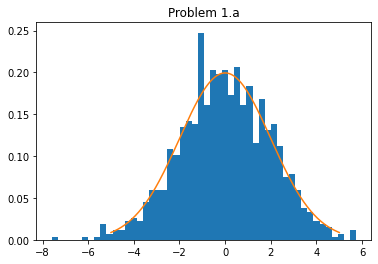

In [4]:
def problem_1_a():
    n = np.random.normal(0, 2, 1000)
    
    normal = scipy.stats.norm(loc=0, scale=2)
    x = np.linspace(-5, 5, 200)
    pdf = normal.pdf(x)

    plt.hist(n, bins=50, density=True)
    plt.plot(x, pdf)
    plt.title("Problem 1.a")
    plt.show()

problem_1_a()

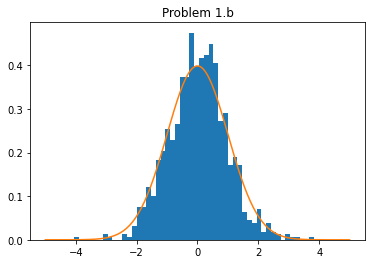

In [5]:
def problem_1_b():
    uniform = scipy.stats.uniform(0, 1)
    normal = scipy.stats.norm(loc=0, scale=1)

    u = uniform.rvs(1000)
    n = normal.ppf(u)
    
    x = np.linspace(-5, 5, 200)
    pdf = normal.pdf(x)

    plt.hist(n, bins=50, density=True)
    plt.plot(x, pdf)
    plt.title("Problem 1.b")
    plt.show()

problem_1_b()

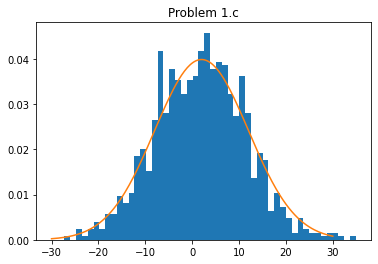

In [6]:
def problem_1_c():
    normal = scipy.stats.norm(loc=0, scale=1)

    n_standard = normal.rvs(1000)
    
    n = 2 + n_standard * 10
    
    x = np.linspace(-30, 30, 200)
    pdf = scipy.stats.norm(loc=2, scale=10).pdf(x)

    plt.hist(n, bins=50, density=True)
    plt.plot(x, pdf)
    plt.title("Problem 1.c")
    plt.show()

problem_1_c()

## Problem 2

Probability to hit inside a circle is the circle's area divided by the square's area i.e.

$$$
P(\text{dart in circle}) = \frac{\text{Area(circle)}}{\text{Area(square)}} = \frac{2\pi r^2}{(2r^2)} = 0.5\pi
$$$

MC algorithm:

- Draw an x and y coordinate uniformly in 0, 1.
- Determine whether (x,y) is inside the circle or outside the circle.
- Accumulate the count of drawn coordinates inside circle and divide it by total number of counts, multiply by two.
- This is ~$\pi$.

In [17]:
np.random.uniform(0, 1, 100)

array([0.92317233, 0.75037301, 0.46138365, 0.73652011, 0.34679578,
       0.18039371, 0.02828323, 0.31542953, 0.37919174, 0.00296709,
       0.40113774, 0.08052186, 0.26293395, 0.15394728, 0.05731428,
       0.72540816, 0.70399756, 0.08584695, 0.47760889, 0.07693345,
       0.55163667, 0.13892112, 0.85207358, 0.32765436, 0.44935226,
       0.71825275, 0.83975323, 0.79223418, 0.12496943, 0.42279631,
       0.76174998, 0.86542227, 0.45514901, 0.85909224, 0.52767605,
       0.47275872, 0.79769752, 0.11016007, 0.77006942, 0.40155043,
       0.69652447, 0.35885477, 0.25683283, 0.97789856, 0.62025469,
       0.77270282, 0.03283451, 0.21857954, 0.46699689, 0.48257833,
       0.99202133, 0.82891983, 0.84587657, 0.64843038, 0.64079144,
       0.86461753, 0.81353431, 0.91481878, 0.30788743, 0.9403619 ,
       0.50285263, 0.48139031, 0.52473344, 0.83159686, 0.58075836,
       0.92946947, 0.58445993, 0.69607193, 0.52099315, 0.84651452,
       0.59346926, 0.24987389, 0.01129428, 0.98301974, 0.74249

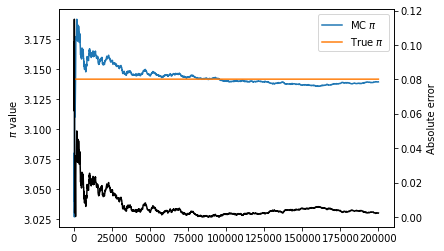

In [48]:
def problem_2_b(n_repeats=2000):
    repeats = np.linspace(1, n_repeats, n_repeats)
    samples_per_repeat = 100

    pi_estimates = []
    count_total = 0
    count_inside = 0
    for repeat in repeats:
        x, y =  np.random.uniform(0, 1, samples_per_repeat), np.random.uniform(0, 1, samples_per_repeat)

        count_inside += sum(np.sqrt(x ** 2 + y ** 2) <= 1)
        count_total += samples_per_repeat

        pi_estimate = 4 * count_inside / count_total
        pi_estimates.append(pi_estimate)
    
    pi_estimates = np.array(pi_estimates)

    fig, ax1 = plt.subplots()
    ax1.plot(repeats * samples_per_repeat, pi_estimates, label="MC $\pi$")
    ax1.plot(repeats * samples_per_repeat, np.ones_like(pi_estimates) * np.pi, label="True $\pi$")
    ax1.set_ylabel("$\pi$ value")
    ax1.legend()
    
    ax2 = ax1.twinx()
    ax2.plot(repeats * samples_per_repeat, np.abs(np.ones_like(pi_estimates) * np.pi - pi_estimates), label="Error", color="k")
    ax2.set_ylabel("Absolute error")


problem_2_b()